IntSlider(value=680, description='Wavelength (nm)', max=780, min=380, step=10)

IntSlider(value=35, description='Focal Length', min=10)

FloatSlider(value=18.7, description='Mirror Displacement (μm)', max=40.0)

ToggleButton(value=True, button_style='success', description='Laser On/Off')

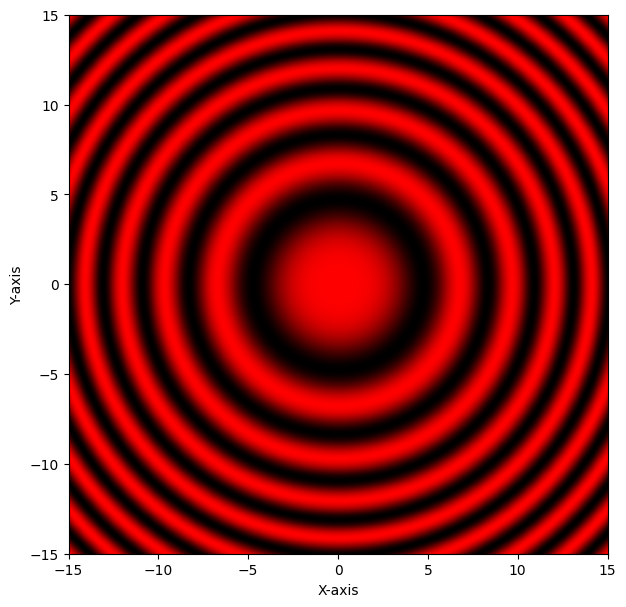

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import matplotlib.colors as mcolors

# Define initial parameters
wavelength_nm = 700  # Default laser wavelength in nm
focal_length = 10  # Lens focal length
laser_on = False
mirror_displacement = 1  # Displacement in micrometers

# Define wavelength to color mapping function
def wavelength_to_rgb(wavelength):
    """Convert a wavelength (nm) to an RGB color value."""
    if 380 <= wavelength < 440:
        R = -(wavelength - 440) / (440 - 380)
        G = 0.0
        B = 1.0
    elif 440 <= wavelength < 490:
        R = 0.0
        G = (wavelength - 440) / (490 - 440)
        B = 1.0
    elif 490 <= wavelength < 510:
        R = 0.0
        G = 1.0
        B = -(wavelength - 510) / (510 - 490)
    elif 510 <= wavelength < 580:
        R = (wavelength - 510) / (580 - 510)
        G = 1.0
        B = 0.0
    elif 580 <= wavelength < 645:
        R = 1.0
        G = -(wavelength - 645) / (645 - 580)
        B = 0.0
    elif 645 <= wavelength <= 780:
        R = 1.0
        G = 0.0
        B = 0.0
    else:
        R = G = B = 0.0
    return np.array([R, G, B])

# Define intensity calculation function
def calculate_intensity(wavelength, displacement, focal_length, radius):
    """Calculate intensity at a given radius based on Michelson interferometer theory."""
    intensity = 1 + np.cos(2 * np.pi / wavelength * 2 * displacement * focal_length / np.sqrt(focal_length**2 + radius**2))
    return intensity

# Generate interference pattern
def interference_pattern(wavelength_nm, mirror_displacement, focal_length):
    """Generate an accurate Michelson interference pattern with a lens effect."""
    x = np.linspace(-15, 15, 500)
    y = np.linspace(-15, 15, 500)
    X, Y = np.meshgrid(x, y)
    
    R = np.sqrt(X**2 + Y**2)
    intensity = calculate_intensity(wavelength_nm * 1e-9, mirror_displacement * 1e-6, focal_length, R)
    
    # Normalize intensity values to the range 0-1
    intensity = (intensity - np.min(intensity)) / (np.max(intensity) - np.min(intensity))
    
    # Convert intensity to a wavelength-based color
    color = wavelength_to_rgb(wavelength_nm)
    rgb = np.zeros((*intensity.shape, 3))
    for i in range(3):
        rgb[..., i] = intensity * color[i]
    return rgb

# UI elements
wavelength_slider = widgets.IntSlider(min=380, max=780, step=10, value=wavelength_nm, description='Wavelength (nm)')
focal_length_slider = widgets.IntSlider(min=10, max=100, step=1, value=focal_length, description='Focal Length')
mirror_displacement_slider = widgets.FloatSlider(min=0, max=40, step=0.1, value=mirror_displacement, description='Mirror Displacement (μm)')
laser_toggle = widgets.ToggleButton(value=laser_on, description='Laser On/Off', button_style='success')

def update(change):
    global laser_on
    laser_on = laser_toggle.value
    
    new_wavelength = wavelength_slider.value
    new_focal_length = focal_length_slider.value
    new_displacement = mirror_displacement_slider.value
    
    clear_output(wait=True)
    display(HTML(f"""<h3>Michelson Interferometer Simulation</h3>"""))
    display(wavelength_slider, focal_length_slider, mirror_displacement_slider, laser_toggle)
    
    if laser_on:
        new_rgb_intensity = interference_pattern(new_wavelength, new_displacement, new_focal_length)
        fig, ax = plt.subplots(figsize=(7, 7))
        ax.imshow(new_rgb_intensity, extent=(-15, 15, -15, 15), origin='lower')
        ax.set_xlabel("X-axis")
        ax.set_ylabel("Y-axis")
        plt.show()

# Attach sliders to update function
wavelength_slider.observe(update, names='value')
focal_length_slider.observe(update, names='value')
mirror_displacement_slider.observe(update, names='value')
laser_toggle.observe(update, names='value')

# Display UI elements
display(HTML("""<h3>Michelson Interferometer Simulation</h3>"""))
display(wavelength_slider, focal_length_slider, mirror_displacement_slider, laser_toggle)
update(None)
